<a href="https://colab.research.google.com/github/Starx93/Analyzing-Stock-Revenue-data/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling[1].csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Dividing the dataset into Dependent and Independent features
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames
x=pd.concat([x,geography,gender], axis=1)

#dropping unnecessary columns
x=x.drop(['Geography','Gender'], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
# Now let's create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Let's initialize the ANN
classifier = Sequential()

In [ ]:
#adding the input layer
classifier.add(Dense(units=11, activation='relu'))

#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
#adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

#adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#normally the learning rate of the adam is 0.01

In [ ]:
#if we want to change the learning rate then:
#from tensorflow.keras.optimizers import Adam
#opt=Adam(learning_rate=0.01)
#classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    verbose=1,
    mode='auto',
    restore_best_weights=False,
)

In [ ]:
model_history=classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7973 - loss: 0.5414 - val_accuracy: 0.7955 - val_loss: 0.4641
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7958 - loss: 0.4485 - val_accuracy: 0.8016 - val_loss: 0.4380
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8178 - loss: 0.4201 - val_accuracy: 0.8092 - val_loss: 0.4237
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8248 - loss: 0.4027 - val_accuracy: 0.8167 - val_loss: 0.4084
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.3788 - val_accuracy: 0.8307 - val_loss: 0.3943
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8360 - loss: 0.3812 - val_accuracy: 0.8410 - val_loss: 0.3785
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8561 - loss: 0.3516 - val_accuracy: 0.8466 - val_loss: 0.3696
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8572 - loss: 0.3442 - 

In [ ]:
 model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

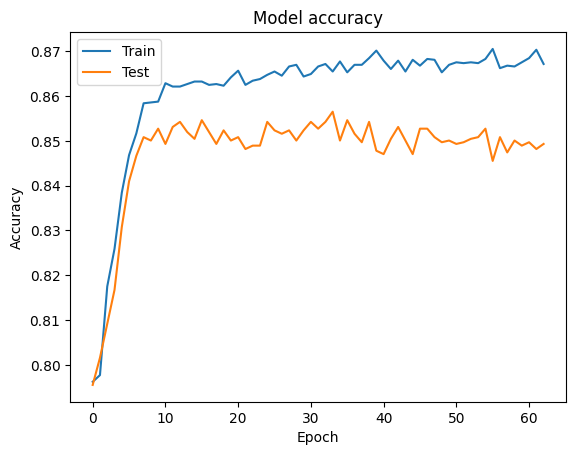

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

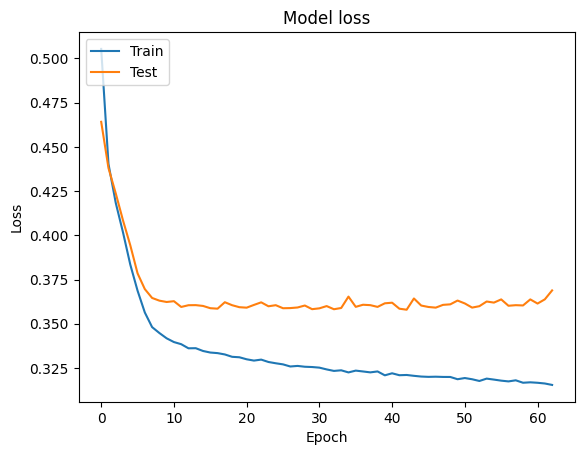

In [ ]:
#suumarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [72]:
#making the predictions and evaluating the model
#predicting the test results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [73]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1536,   59],
       [ 220,  185]])

In [74]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8605